# **1. Perkenalan Dataset**


Tahap pertama dalam proyek ini adalah menentukan dataset yang relevan dengan permasalahan yang akan diselesaikan. Dataset yang dipilih harus mampu merepresentasikan kondisi dunia nyata serta mendukung penerapan teknik *Machine Learning* secara optimal.

---

## Seattle Weather Prediction Dataset

---

## a. Penjelasan Proyek

Proyek ini berfokus pada penerapan teknik **Machine Learning** untuk menyelesaikan permasalahan **prediksi kondisi cuaca** di wilayah Seattle. Dengan memanfaatkan data historis cuaca, proyek ini bertujuan untuk membangun model yang mampu memprediksi kondisi cuaca berdasarkan parameter-parameter meteorologi yang tersedia.

Permasalahan yang diselesaikan dalam proyek ini termasuk dalam kategori **klasifikasi**, karena target yang diprediksi berupa kelas atau kategori kondisi cuaca tertentu.

Tujuan utama dari proyek ini adalah:

1. Menganalisis hubungan antara fitur-fitur cuaca seperti curah hujan, suhu, dan kecepatan angin terhadap kondisi cuaca.
2. Membangun model *Machine Learning* yang mampu mengklasifikasikan kondisi cuaca secara akurat.
3. Menyusun pipeline preprocessing data yang konsisten dan dapat diotomatisasi untuk mendukung proses pelatihan model.

---

## b. Sumber dan Atribusi Dataset

| Keterangan | Detail |
|-----------|--------|
| **Nama Dataset** | Seattle Weather Prediction Dataset |
| **Sumber** | Kaggle |
| **Tujuan Utama** | Klasifikasi kondisi cuaca berdasarkan data historis |
| **Jenis Masalah** | Klasifikasi |
| **Link Dataset** | https://www.kaggle.com/datasets/ananthr1/weather-prediction |


Dataset ini disimpan sebagai **data mentah (raw data)** dan akan melalui beberapa tahapan, mulai dari *Exploratory Data Analysis (EDA)* hingga preprocessing, sebelum digunakan untuk pelatihan model *Machine Learning*.

---


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [4]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [5]:
#Type your code here
df = pd.read_csv("../seattle-weather_raw.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
#Type your code here
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [7]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [9]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [10]:
df.duplicated().sum()

0

C:\Users\Asus\AppData\Local\Temp\ipykernel_23296\34098205.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=30,palette='Set3')
C:\Users\Asus\AppData\Local\Temp\ipykernel_23296\34098205.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=30,palette='Set3')
C:\Users\Asus\AppData\Local\Temp\ipykernel_23296\34098205.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=30,palette='Set3')
C:\Users\Asus\AppData\Local\Temp\ipykernel_23296\34098205.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=30,palette='Set3')


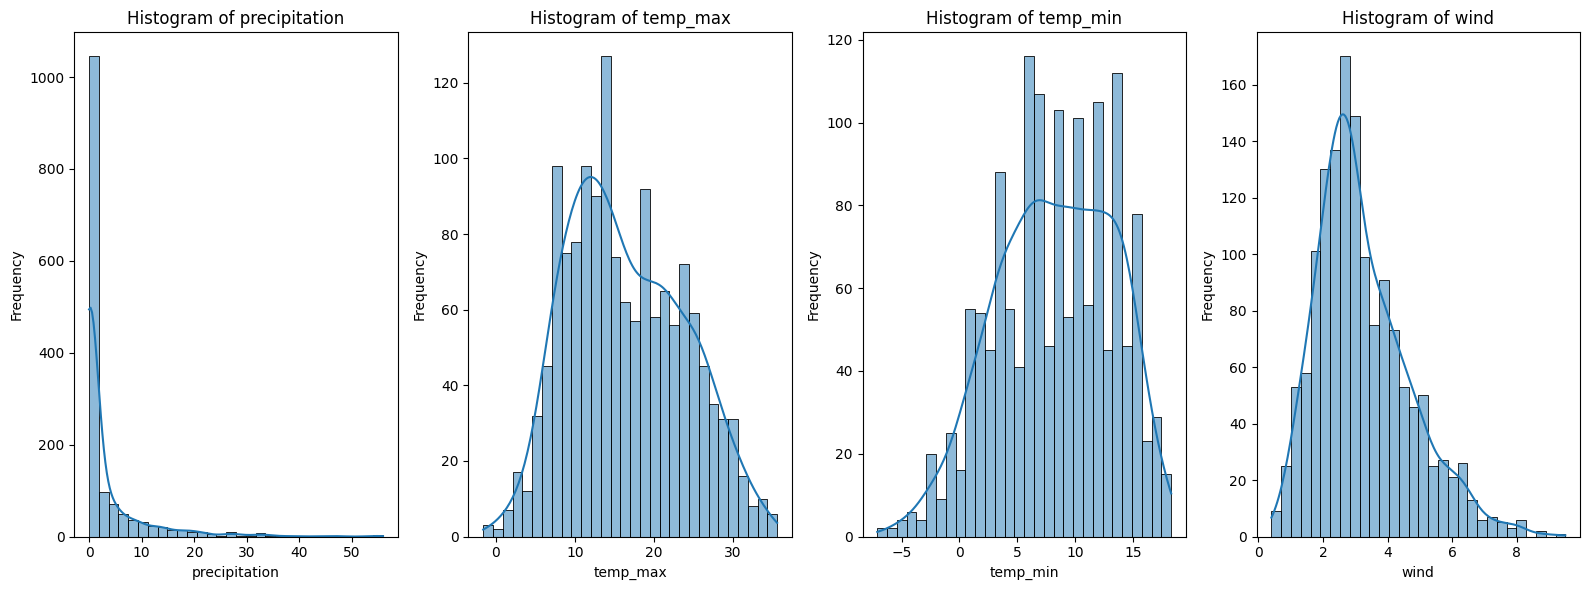

In [11]:
def eda_univariate_numeric(df):
    numeric_columns = df.select_dtypes(include=['number']).columns
    num_columns = len(numeric_columns)

    cols_per_row = 4
    num_rows = (num_columns + cols_per_row - 1) // cols_per_row
    plt.figure(figsize=(16, 6 * num_rows))

    for idx, col in enumerate(numeric_columns):
        plt.subplot(num_rows, cols_per_row, idx + 1)
        sns.histplot(df[col], kde=True, bins=30,palette='Set3')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

eda_univariate_numeric(df)

C:\Users\Asus\AppData\Local\Temp\ipykernel_23296\2562148599.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col],palette='Set3')
C:\Users\Asus\AppData\Local\Temp\ipykernel_23296\2562148599.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col],palette='Set3')
C:\Users\Asus\AppData\Local\Temp\ipykernel_23296\2562148599.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col],palette='Set3')
C:\Users\Asus\AppData\Local\Temp\ipykernel_23296\2562148599.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is d

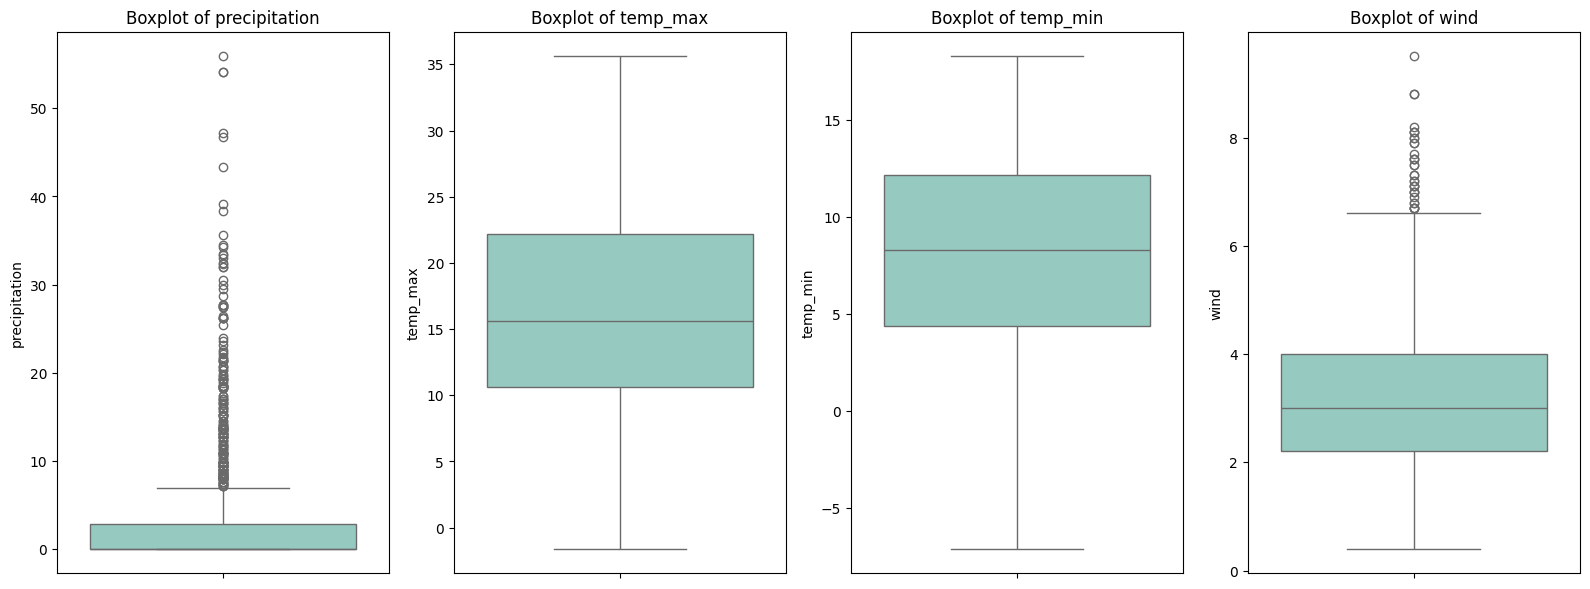

In [12]:
def eda_univariate_numeric_boxplot(df):
    numeric_columns = df.select_dtypes(include=['number']).columns
    num_columns = len(numeric_columns)

    cols_per_row = 4
    num_rows = (num_columns + cols_per_row - 1) // cols_per_row

    plt.figure(figsize=(16, 6 * num_rows))

    for idx, col in enumerate(numeric_columns):
        plt.subplot(num_rows, cols_per_row, idx + 1)
        sns.boxplot(y=df[col],palette='Set3')
        plt.title(f'Boxplot of {col}')
        plt.ylabel(col)

    plt.tight_layout()
    plt.show()

eda_univariate_numeric_boxplot(df)

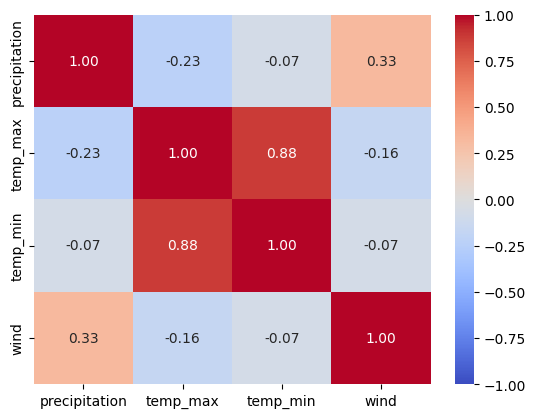

In [13]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="coolwarm", annot=True,fmt='.2f')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_23296\4199401555.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette='Set3')
C:\Users\Asus\AppData\Local\Temp\ipykernel_23296\4199401555.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=order, palette='Set3')


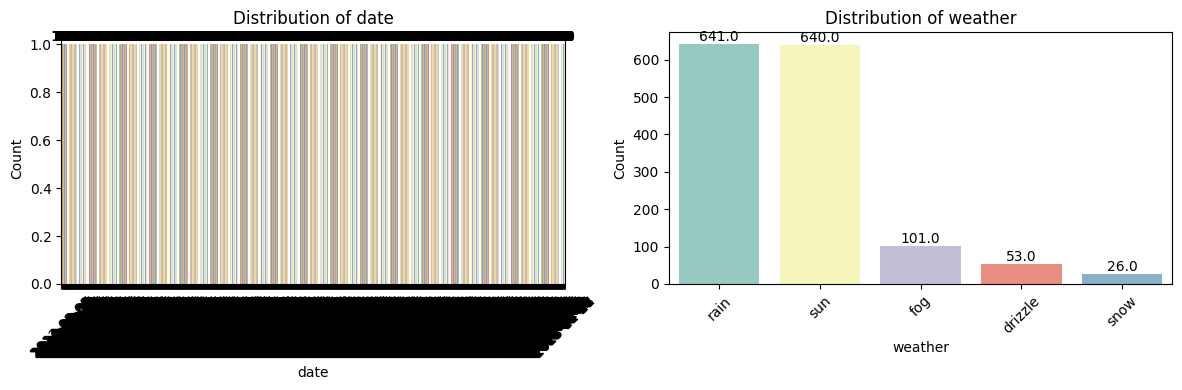

In [14]:
def plot_all_categorical_histograms(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    num_columns = len(categorical_columns)

    cols_per_row = 3
    num_rows = (num_columns + cols_per_row - 1) // cols_per_row

    plt.figure(figsize=(6 * cols_per_row, 4 * num_rows))

    for idx, col in enumerate(categorical_columns):
        plt.subplot(num_rows, cols_per_row, idx + 1)
        order = df[col].value_counts().index
        ax = sns.countplot(data=df, x=col, order=order, palette='Set3')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()
plot_all_categorical_histograms(df)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [15]:
df_new = df.copy()

In [16]:
df_new.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [17]:
df_new.dropna(inplace=True)

In [18]:
df_new.drop_duplicates(inplace=True)

In [19]:
df_new = df_new.drop(columns=[ "date"])
df_new.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [20]:
le = LabelEncoder()
df_new["weather"] = le.fit_transform(df_new["weather"])
df_new.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2


In [21]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:", label_mapping)

Label mapping: {'drizzle': 0, 'fog': 1, 'rain': 2, 'snow': 3, 'sun': 4}


In [22]:
columns_to_scale = ["temp_max", "temp_min", "precipitation", "wind"]
scaler = RobustScaler()
df_new[columns_to_scale] = scaler.fit_transform(df_new[columns_to_scale])
df_new.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,-0.241379,-0.423077,0.944444,0
1,3.892857,-0.431034,-0.705128,0.833333,2
2,0.285714,-0.336207,-0.141026,-0.388889,2
3,7.250000,-0.293103,-0.346154,0.944444,2
4,0.464286,-0.577586,-0.705128,1.722222,2


In [ ]:
df_new.to_csv("seattle-weather_preprocessing.csv", index=False)